
# <p style="text-align: center;">MIS 382N: ADVANCED PREDICTIVE MODELING - MSBA</p>
# <p style="text-align: center;">Assignment 3</p>
## <p style="text-align: center;">Total points: 85 </p>
## <p style="text-align: center;">Due: October 19, submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Your partner needs to be from the same section. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTEID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group. If you do change, let the TA know. 

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

### Name(s)
1. Matthew Leong - mcl2994
2. Chirag Ramesh - cr44748

## My contribution:

As Chirag was busy at the time, I handled all of the code for this assignment. I also did the analysis for question 4 which involved various pre processing methods and question 5 which was peer review of lecture supplements. I also assisted Chirag with the analysis for questions 1 involving the multi-layer perception neural network and question 3 involving an analysis on feature selection. We both worked on question 2 though we decided to go with the bulk of my analysis.

# Question 1 - MLP Regressor (15 pts) 
In this question, you will explore the application of Multi-layer Perceptron (MLP) regression using sklearn package in Python; http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html.

The following code will pre-process the data and split the data into training and test sets using train_test_split with random state 30 and test_size = 0.25.

The dataset is loaded from q2_data.csv which contains features of engine and the predictor varialble is "mpg". The features are:
* cylinders 
* displacement
* horsepower
* weight
* acceleration

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import (train_test_split,KFold)
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import glob
%matplotlib inline


df = pd.read_csv('q2_data.csv') 
df.dropna(inplace=True)
df.columns
y = df['mpg'].values
X = df.drop(['mpg'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state=30)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(294, 5) (294,) (98, 5) (98,)


In [2]:
df.head()

mpg  cylinders  displacement  horsepower  weight  acceleration
0  18.0          8         307.0       130.0    3504          12.0
1  15.0          8         350.0       165.0    3693          11.5
2  18.0          8         318.0       150.0    3436          11.0
3  16.0          8         304.0       150.0    3433          12.0
4  17.0          8         302.0       140.0    3449          10.5

We also want to use [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Instead of fitting a model on the original data, we use StandardScaler to center each feature ([Example](http://scikit-learn.org/stable/auto_examples/applications/plot_prediction_latency.html#sphx-glr-auto-examples-applications-plot-prediction-latency-py)). Also remember that when we have training and testing data, we fit preprocessing parameters on training data and apply them to all testing data. You should scale only the features (independent variables), not the target variable y.


   
1) (**5pts**) Now, use the parameters for MLP Regressor as below to train a MLPRegressor models on the entire training set and report the RMSE score for both the trainnig and testing sets (again, use StandardScaler) for the different number of hidden units.

   (a) *hidden_layer_sizes = (5,)* 
   
   (b) *hidden_layer_sizes = (15,)*
   
   (c) *hidden_layer_sizes = (50,)*

    activation = 'tanh', solver = 'sgd', learning_rate='constant', random_state=42, batch_size= 20,       learning_rate_init = 0.005
    
   Which of the three models ((a)-(c)) performs the best? Briefly analyze and discuss the results, commenting on the number of hidden units.


2) (**5pts**) MLPRegressor has a built-in attribute *loss\_curve\_* which returns the loss at each epoch (misleadingly referred to as "iteration" in scikit documentation, though they use epoch in the actual code!). For example, if your model is named as *my_model* you can call it as *my\_model.loss\_curve\_* ([example](http://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_training_curves.html#sphx-glr-auto-examples-neural-networks-plot-mlp-training-curves-py)). Plot three curves using the following three conditions (a, b, c) in one figure, where *X-axis* is epoch  number and *Y-axis* is squared root of *loss\_curve\_*:

   (a) *hidden_layer_sizes = (5,)* 
   
   (b) *hidden_layer_sizes = (15,)*
   
   (c) *hidden_layer_sizes = (50,)* 

   
3) (**5pts**) Now, use the parameters for MLP Regressor as below to train a MLPRegressor models on the entire training set for different batch size. 

    activation = 'tanh', solver = 'sgd', learning_rate='constant', random_state=42,learning_rate_init = 0.005 , hidden_layer_sizes = (15,)
   
   Plot three different figures for the three batch size, where *X-axis* is epoch  number and *Y-axis* is squared root of *loss\_curve\_*: 

   (a) *batch_size = 1* 
   
   (b) *batch_size = 20*  
   
   (c) *batch_size = 2000* 
     
   **Compare the three plots obtained comment on the gradient updates. What do you understand about the difference between batch_size = 1, 20 and 2000.**

# Answer 1

In [3]:
#1 Using Standard Scaler
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler()
X_train = X_scaler.fit_transform(X_train)
X_test = X_scaler.transform(X_test)

#hidden_layer_sizes = (5,)
mlp5 = MLPRegressor(hidden_layer_sizes = (5,), activation = 'tanh', solver = 'sgd', 
    learning_rate='constant', random_state=42, batch_size= 20, learning_rate_init = 0.005).fit(X_train, y_train)

#hidden_layer_sizes = (15,)
mlp15 = MLPRegressor(hidden_layer_sizes = (15,), activation = 'tanh', solver = 'sgd', 
    learning_rate='constant', random_state=42, batch_size= 20, learning_rate_init = 0.005).fit(X_train, y_train)

#hidden_layer_sizes = (50,)
mlp50 = MLPRegressor(hidden_layer_sizes = (50,), activation = 'tanh', solver = 'sgd', 
    learning_rate='constant', random_state=42, batch_size= 20, learning_rate_init = 0.005).fit(X_train, y_train)

#generate prediction for train set
mlp5_train_pred = mlp5.predict(X_train)
mlp15_train_pred = mlp15.predict(X_train)
mlp50_train_pred = mlp50.predict(X_train)

#generate prediction for test set
mlp5_test_pred = mlp5.predict(X_test)
mlp15_test_pred = mlp15.predict(X_test)
mlp50_test_pred = mlp50.predict(X_test)

#RMSE for train set
mlp5_train_RMSE = mean_squared_error(y_train, mlp5_train_pred, squared=False)
mlp15_train_RMSE = mean_squared_error(y_train, mlp15_train_pred, squared=False)
mlp50_train_RMSE = mean_squared_error(y_train, mlp50_train_pred, squared=False)

#RMSE for train set
mlp5_test_RMSE = mean_squared_error(y_test, mlp5_test_pred, squared=False)
mlp15_test_RMSE = mean_squared_error(y_test, mlp15_test_pred, squared=False)
mlp50_test_RMSE = mean_squared_error(y_test, mlp50_test_pred, squared=False)

print('RMSE for training set and testing set with hidden layer size=(5,) is ', mlp5_train_RMSE,mlp5_test_RMSE)
print('RMSE for training set and testing set with hidden layer size=(15,) is ', mlp15_train_RMSE,mlp15_test_RMSE)
print('RMSE for training set and testing set with hidden layer size=(50,) is ', mlp50_train_RMSE,mlp50_test_RMSE)

RMSE for training set and testing set with hidden layer size=(5,) is  3.3601289540161896 4.7984130428905605
RMSE for training set and testing set with hidden layer size=(15,) is  3.019913013712589 4.5517066936252295
RMSE for training set and testing set with hidden layer size=(50,) is  2.940964154111819 4.7726684612395305


The lowest training RMSE is when hidden layer = 50 and the lowest testing RMSE is when hidden layer = 15.
The hidden layer = 50 could possible be overfitting so its getting a low training RMSE and a high testing RMSE.
We can conclude that hidden layer = 15 is our best model.

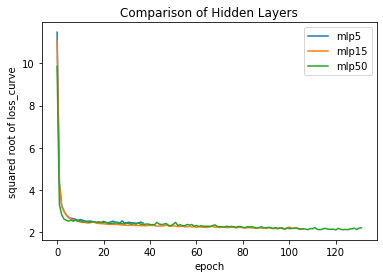

In [4]:
#2 Hidden layer comparison
import matplotlib.pyplot as plt

arr1=plt.plot(np.sqrt(mlp5.loss_curve_),label='mlp5')
arr2=plt.plot(np.sqrt(mlp15.loss_curve_),label='mlp15')
arr3=plt.plot(np.sqrt(mlp50.loss_curve_),label='mlp50')
plt.xlabel('epoch')
plt.ylabel('squared root of loss_curve')
plt.title('Comparison of Hidden Layers')
plt.legend()
plt.show()

C:\Users\mattl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:353: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


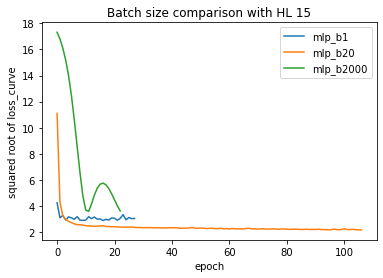

In [5]:
#3 Batch size comparison
#batch_size = 1
mlp_b1 = MLPRegressor(hidden_layer_sizes = (15,), activation = 'tanh', solver = 'sgd', learning_rate='constant', random_state=42, batch_size= 1, learning_rate_init = 0.005).fit(X_train, y_train)
#batch_size = 20
mlp_b20 = MLPRegressor(hidden_layer_sizes = (15,), activation = 'tanh', solver = 'sgd', learning_rate='constant', random_state=42, batch_size= 20, learning_rate_init = 0.005).fit(X_train, y_train)
#batch_size = 2000
mlp_b2000 = MLPRegressor(hidden_layer_sizes = (15,), activation = 'tanh', solver = 'sgd', learning_rate='constant', random_state=42, batch_size= 2000, learning_rate_init = 0.005).fit(X_train, y_train)

arr4=plt.plot(np.sqrt(mlp_b1.loss_curve_),label='mlp_b1')
arr5=plt.plot(np.sqrt(mlp_b20.loss_curve_),label='mlp_b20')
arr6=plt.plot(np.sqrt(mlp_b2000.loss_curve_),label='mlp_b2000')
plt.xlabel('epoch')
plt.ylabel('squared root of loss_curve')
plt.title('Batch size comparison with HL 15')
plt.legend(loc='best')
plt.show()

Batch size refers to the number of training examples utilized in one iteration. There are pros and cons to each batch size that we choose. Batch size controls the accuracy of the estimate of the error gradient when training neural networks. Batch, Stochastic, and Minibatch gradient descent are the three main flavors of the learning algorithm. When the batch size is less than the number of samples then typically networks train faster because we are updating the weights after each propagation. But a disadvantage is that smaller the batch size the less accurate the estimate of our gradient will be. 

# Question 2: Tensor Playground (15 points)
Visit https://playground.tensorflow.org for this problem

From the far right, select "Classification" as the problem type, and select the data set on the top right (alternate colored squares).

Use these settings as the DEFAULT settings for all subquestions: test/training ratio = 50%, Noise = 0, Batch Size = 30, learning rate = 0.03, activation = tanh, one hidden layer with 2 neurons, input as $X_1$, $X_2$ and no Regularization.

1) Use the DEFAULT setting and run two experiments - one using Tanh as the activation function and one using the linear activation function. Report the train, test losses for both these experiments at the end of 1000 epochs. What qualitative difference do you observe in the decision boundaries obtained? Why? (**4 pts**)

We will now study the effect of certain variations in the network structure or training, keeping all other aspects the same as in the default configuration specified above, and with tanh as the activation for hidden units.

2) Effect of number of hidden units: Go back to DEFAULT settings and report the train, test losses at the end of 1000 epochs for 4 and 8 neurons in the hidden layer (2 pairs of results). What do you observe regarding the decision boundary as the number of neurons increases? Why? (**4 pts**)

3) Effect of learning rate and number of epochs: Go back to DEFAULT settings and set the activation to be Relu and have four neurons in the hidden layer. Report the train, test losses at the end of 100 epochs and 1000 epochs for learning rates of 10, 0.1, 0.01 and 0.001 (8 pairs of results). What do you observe in the loss curves? Explain. (**4 pts**)

4) Go back to DEFAULT settings. Play around with any of the other hyperparameters, network architectures and input features (such as $\sin(X_1), X_1^2$ etc.) and report the best train/test loss you could get (test loss should be at most 0.06). Attach the screenshot from Tensor playground for the same (show your full network, output and parameters). Briefly justify your decisions, and comment on difficulties/tradeoffs, what helps/what doesn't,etc. (**3 pts**)

# Answer 2

1) Activation functions  
Tanh Activation  
Test Loss: 0.221  
Train Loss: 0.203   
Linear Activation  
Test: 0.499  
Train: 0.499  

It seems that tensor playground gives us different results every time we run our tanh activation function. Regardless, there is a noticable difference between the two loss functions. The tanh activation function gives two boundaries or lines that seperate points into either orange or blue. More specifically, the middle is classified orange while the outsides are classified blue. The linear activation function on the other hand only gives one boundary that seperates the points into orange or blue. This is most likely due to the activation function in of itself. Tanh is well tangent while linear is linear. By its very nature the linear activation function can only produce one boundary line and thus can't deviate from 0.50 loss that much. Similarly, we can expect the three boundaries laid out by tanh.

2) 4 neurons vs 8 neurons  
4 neuron  
Test Loss: 0.017  
Train Loss: 0.016 
8 neuron  
Test Loss: 0.017  
Train Loss: 0.006  

In comparison to the 2 neuron network, the 4 neuron network still yields two boundaries but this time they are curved. The middle is now blue and the outsides are now orange. Regardless, it seems to be able to capture the relationship of the data very well with the losses being a major improvement over the old ones. The 8 neuron network's boundaries yield more of an hourglass shape with the middle being orange and the outside being blue. We think that the shape of the 8 neurons is a result of possible overfitting. Notably, the train loss was very low for the 8 neurons but the test loss remained the same which is a clear sign of a possible overfit.

3) Learning Rate comparison:  
learning rate 10 Epoch 100  
Test loss 0.520  
Training loss 0.480  
  
learning rate 10 Epoch 1000  
Test loss 0.520  
Training loss 0.480  
  
learning rate 0.1 Epoch 100  
Test loss 0.259  
Training loss 0.265  
  
learning rate 0.1 Epoch 1000  
Test loss 0.251  
Training loss 0.249  
  
learning rate 0.01 Epoch 100  
Test loss 0.129  
Training loss 0.147  
  
learning rate 0.01 Epoch 1000  
Test loss 0.010  
Training loss 0.010  
  
learning rate 0.001 Epoch 100  
Test loss 0.293  
Training loss 0.293  
  
learning rate 0.001 Epoch 1000  
Test loss 0.109  
Training loss 0.104  

Learning rate 10: lots of oscilations until epoch 100. Afterwards stayed constant. Learning rate loss curve went down at first but stayed a curve. Constant mostly after 100. At learning rate of 0.01, convergence comes much later. Less steep of a curve. At a learning rate of 0.001, the curve is less steep and convergence towards a "straight line" still hasn't happened yet. We think that this phenomenon essentially occurs due to the learning rate controlling the speed at which the model learns about the data. At a learning rate too fast, the model may overshoot and land on non optimal parameters. A slower learning rate on the other hand helps the model not overshoot and seems to yield the optimal parameters. Though a learning rate that is too slow will take a while to converge on said parameters.

4) Optimal Model for this network

![network_model](https://i.imgur.com/9aj4DzW.png)

Seeing as how the data was symmetrical, we thought that we could obtain a pretty good model by changing the inputs towards $x_1*x_2$ reasoning that a simple transformation such as a positive or negative identity would result in the classification scheme and as it turns out with mostly default settings, this model performs very well. Seeing as we had little difficulties, there isn't much else to say other than having a good theory as to how a data is distributed if possible is the most effective way to model a problem.

# Question 3 - Feature Selection (20 pts)

In this question, we will explore the importance of feature selection, You can use the below code to load the dataset "zoo.csv". This dataset contains a set of features for different animals and the output is class_type 
corresponding to the features. The details of class_type is present in class.csv for your reference.

1. Plot the correlation matrix. The resulting correlation plot should be (n_features * n_features) matrix. List the top 5 most positively correlated features with class_type. (**3pts**)

2. List the top 5 most negatively correlated features with class_type. (**3pts**)

3. Use https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE to perform feature selection with estimator = LogisticRegression(max_iter=1000) estimator. List the top 5 features selected from RFE.(**2pts**)

* Create a train_test split of 80:20(train:test) with random state = 50

* We need to use [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Instead of fitting a model on the original data, we use StandardScaler to center each feature ([Example](http://scikit-learn.org/stable/auto_examples/applications/plot_prediction_latency.html#sphx-glr-auto-examples-applications-plot-prediction-latency-py)). Also remember that when we have training and testing data, we fit preprocessing parameters on training data and apply them to all testing data. You should scale only the features (independent variables), not the target variable y.

4. Train a MLP Regressor with train data and report the ${R^2}$ score on the test set for each of the following, 

   a) Model trained with top 5 most positvely correlated features from part 1
   
   b) Model trained with top 5 most negatively correlated features from part 2
   
   c) Model trained with five features selected by RFE from part 3
   
   d) Finally train a MLP Regressor on the entire training data with the entire orignal features.Use the default values for MLPRegressor as below(**8pts**)

    MLPRegressor(max_iter = 1000,random_state=1)

5. Explain your results based on your understanding of feature selection and the ${R^2}$ score.  (**4pts**) 

In [6]:
df = pd.read_csv("zoo.csv")
df.columns
y = df['class_type'].values
X = df.drop(['class_type','animal_name'], axis = 1)

class_df = pd.read_csv("class.csv")

# Answer 3

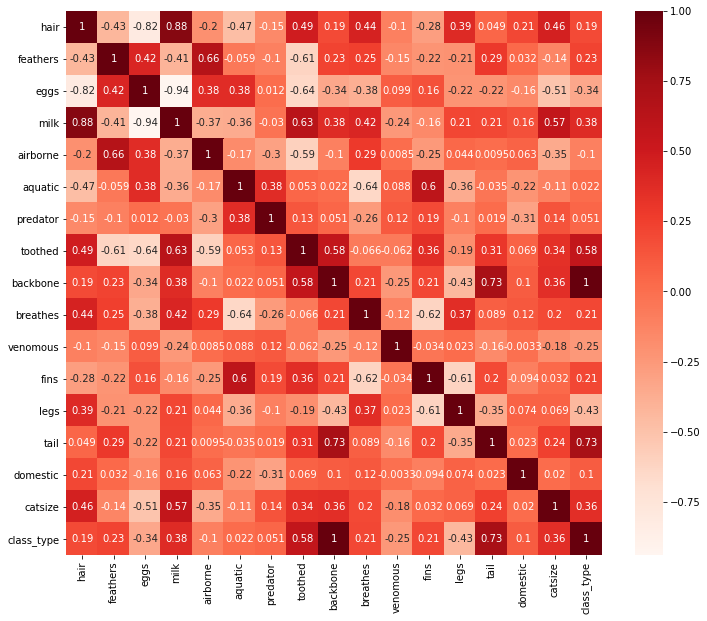

backbone    1.000000
tail        0.731762
toothed     0.575085
milk        0.384958
catsize     0.356976
Name: class_type, dtype: float64

In [7]:
#1. Correlation Matrix
#Top 5 most positively correlated features

import seaborn as sns
# As stated in the email change the class types to either a 0 or a 1.
#1-5 should be a 1
#6,7 should be a 0
df2= df.copy()
df2.loc[df['class_type'] < 6, 'class_type'] = 1
df2.loc[df['class_type'] >= 6, 'class_type'] = 0

plt.figure(figsize=(12,10))
cor=df2.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

#1
cor_target = cor["class_type"]
relevant_positive_features = cor_target[cor_target>0]
relevant_positive_features.sort_values(ascending=False)[1:6]

The top 5 most positively correlated features are backbone, tail, toothed, milk, and catsize.

In [8]:
#2 Top 5 most negatively correlated features with class type.
relevant_negative_features = cor_target
relevant_negative_features.sort_values(ascending=False)[-5:]

aquatic     0.022463
airborne   -0.104718
venomous   -0.246611
eggs       -0.340420
legs       -0.432856
Name: class_type, dtype: float64

The top 5 most negatively correlated features are aquatic, airborne, venomous, eggs, and legs.

In [9]:
#3 Sklearn feature selection
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

estimator = LogisticRegression(max_iter=1000)
selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(X, y)
#print(selector.support_)
#print(selector.ranking_)

cols = list(X.columns)

temp = pd.Series(selector.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['feathers', 'milk', 'toothed', 'backbone', 'breathes'], dtype='object')


The top 5 selected features from RFE are feathers, milk, toothed, backbone, and breathes.

In [10]:
#3. Continued. Doing a train test split with standard scaler.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state=50)

#Using standard scaler
X_scaler = StandardScaler()
X_train = pd.DataFrame(X_scaler.fit_transform(X_train))
X_test = pd.DataFrame(X_scaler.transform(X_test))
X_train.columns=X.columns
X_test.columns=X.columns

#4. Train MLP Regressor with train data for multiple models
from sklearn.metrics import r2_score

#most positive correlated 5 features
X_pos5_train=X_train[['backbone', 'tail', 'toothed', 'milk', 'catsize']]
X_pos5_test=X_test[['backbone', 'tail', 'toothed', 'milk', 'catsize']]
mlp_pos5 = MLPRegressor(max_iter = 1000,random_state=1).fit(X_pos5_train, y_train)
mlp_pos5_test_pred = mlp_pos5.predict(X_pos5_test)
mlp_pos5_r2 = r2_score(y_test, mlp_pos5_test_pred)
print('The R2 score for the 5 most positively correlated features MLP regression is:', mlp_pos5_r2)

#most negative correlated 5 features
X_neg5_train=X_train[['legs', 'eggs', 'venomous', 'airborne', 'aquatic']]
X_neg5_test=X_test[['legs', 'eggs', 'venomous', 'airborne', 'aquatic']]
mlp_neg5 = MLPRegressor(max_iter = 1000,random_state=1).fit(X_neg5_train, y_train)
mlp_neg5_test_pred = mlp_neg5.predict(X_neg5_test)
mlp_neg5_r2 = r2_score(y_test, mlp_neg5_test_pred)
print('The R2 score for the 5 most negatively correlated features MLP regression is:', mlp_neg5_r2)

#RFE selected 5 features
X_rfe_train=X_train[['feathers', 'milk', 'toothed', 'backbone', 'breathes']]
X_rfe_test=X_test[['feathers', 'milk', 'toothed', 'backbone', 'breathes']]
mlp_rfe = MLPRegressor(max_iter = 1000,random_state=1).fit(X_rfe_train, y_train)
mlp_rfe_test_pred = mlp_rfe.predict(X_rfe_test)
mlp_rfe_r2 = r2_score(y_test, mlp_rfe_test_pred)
print('The R2 score for 5 RFE selected features MLP regression is:',mlp_rfe_r2)

#MLP Regression on all features
mlp_all = MLPRegressor(max_iter = 1000,random_state=1).fit(X_train, y_train)
mlp_all_test_pred = mlp_all.predict(X_test)
mlp_all_r2 = r2_score(y_test, mlp_all_test_pred)
print('The R2 score for all of the features MLP regression is:',mlp_all_r2)


The R2 score for the 5 most positively correlated features MLP regression is: 0.9388704719771227
The R2 score for the 5 most negatively correlated features MLP regression is: 0.7738409135055153
The R2 score for 5 RFE selected features MLP regression is: 0.9702879461830074
The R2 score for all of the features MLP regression is: 0.9690391877029567


#### 5.

Regarding $R^2$, this is a percentage metric that details how much of the variation between y and x is explained by the model. With that in mind, it's no wonder that the most negatively correlated features give the lowest $R^2$. Those are the features that are not too correlated with class type in the first place which means that they were going to give a nonoptimal $R^2$ value. By contrast, it seems that the 5 most positively correlated features gave a pretty good $R^2$ which makes sense as those features are highly correlated with class type. However as we discussed in lecture, there is a multicollinearity problem with picking the 5 highest positively correlated features which is why it's still worse than using all the features. In that regard, the RFE feature selection algorithim wins out. From our understanding, the RFE algorithim works by being a sort of recursive cross validation algorithim that bases its criteria off of the coefficients or feature importance. For our problem, it used Logistic regression and tests all the features in the training dataset and removes features to get smaller and smaller subsets until the desired amount is obtained. Regardless, the effectiveness of the algorithim is displayed here as it yields the highest $R^2$ score even with only 5 features. 

# Question 4 (Data Pre-processing - 25pts)
The following dataset contains House Sales data in King County, USA. This dataset contains house sale prices for King County, which includes Seattle. This dataset contains the following columns:

* bedrooms: Number of Bedrooms/House
* bathrooms: Number of bathrooms/bedrooms
* sqft_living: Square footage of the home
* sqft_lot: Square footage of the lot
* floors: Total floors (levels) in house
* waterfront: House which has a view to a waterfront (0/1)
* view: Has been viewed (0-4)
* condition: How good the condition is Overall (1-5)
* grade: Overall grade given to the housing unit, based on King County grading system (1-13)
* sqft_above: Square footage of house apart from basement
* sqft_basement: Square footage of the basement
* yr_built: Built Year
* yr_renovated: Year when house was renovated
* zipcode: Zip code
* price: Selling price of house

Here, price is the dependent variable while all other variables are assumed to be independent variables. Here, 10% cells of most columns in the dataset contain NaN value.

In [11]:
import pandas as pd 
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

np.random.seed(100)

df = pd.read_csv("kc_house_data.csv")
age = df['yr_renovated']
built = df['yr_built']
df.iloc[:, :-1] = df[:-1].mask(np.random.random(df[:-1].shape)<0.1)
df['yr_renovated'] = age
df['yr_built'] = built
df.head()

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0       3.0       1.00       1180.0    5650.0     NaN         0.0   0.0   
1       3.0       2.25       2570.0    7242.0     2.0         0.0   0.0   
2       2.0       1.00        770.0   10000.0     NaN         0.0   0.0   
3       4.0       3.00       1960.0    5000.0     1.0         0.0   0.0   
4       3.0       2.00       1680.0    8080.0     1.0         0.0   0.0   

   condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0        3.0    7.0      1180.0            0.0      1955             0   
1        3.0    7.0      2170.0          400.0      1951          1991   
2        NaN    6.0       770.0            0.0      1933             0   
3        5.0    7.0      1050.0          910.0      1965             0   
4        3.0    8.0      1680.0            0.0      1987             0   

   zipcode     price  
0  98178.0  221900.0  
1  98125.0  538000.0  
2      NaN  180000.0  
3      NaN  604000.0  
4  98074.0  510000.0

### Question 4.1 (5 points)
Print the number of NaN values in each column. Next, if the value of `yr_renovated` is equal to 0, set it equal to the corresponding value of `yr_built`.

In [12]:
df.isna().sum()

bedrooms         2150
bathrooms        2150
sqft_living      2170
sqft_lot         2091
floors           2152
waterfront       2179
view             2184
condition        2096
grade            2135
sqft_above       2163
sqft_basement    2198
yr_built            0
yr_renovated        0
zipcode          2169
price               0
dtype: int64

In [13]:
df['yr_renovated'] = df.apply(lambda x: x['yr_built'] if x['yr_renovated']==0 else x['yr_renovated'], axis=1)        
df.head()

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0       3.0       1.00       1180.0    5650.0     NaN         0.0   0.0   
1       3.0       2.25       2570.0    7242.0     2.0         0.0   0.0   
2       2.0       1.00        770.0   10000.0     NaN         0.0   0.0   
3       4.0       3.00       1960.0    5000.0     1.0         0.0   0.0   
4       3.0       2.00       1680.0    8080.0     1.0         0.0   0.0   

   condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0        3.0    7.0      1180.0            0.0      1955        1955.0   
1        3.0    7.0      2170.0          400.0      1951        1991.0   
2        NaN    6.0       770.0            0.0      1933        1933.0   
3        5.0    7.0      1050.0          910.0      1965        1965.0   
4        3.0    8.0      1680.0            0.0      1987        1987.0   

   zipcode     price  
0  98178.0  221900.0  
1  98125.0  538000.0  
2      NaN  180000.0  
3      NaN  604000.0  
4  98074.0  510000.0

### Question 4.2 (6 points)

Create a copy of `df` named `df_dm` and create a new column in `df_dm` named `binned_yr_built` and apply binning to the column `yr_built`. Use [pandas.cut()](https://stackoverflow.com/a/31740881) and modify its paramter list as below:
- `bins=[1900, 1920, 1940, 1960, 1980, 2000, 2020]`
- `labels=['1900-1920', '1920-1940', '1940-1960', '1960-1980', '1980-2000', '2000-2020']`
- `include_lowest=True`

Next, perform one-hot encoding using this new column.

In [14]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

df_dm=df.copy()
df_dm['binned_yr_built']=pd.cut(df['yr_built'], bins=[1900, 1920, 1940, 1960, 1980, 2000, 2020], 
                                labels=['1900-1920', '1920-1940', '1940-1960', '1960-1980', '1980-2000', '2000-2020'], 
                                include_lowest=True)
df_dm.head()
#one hot encoding

# creating instance of labelencoder
labelencoder = LabelEncoder()

# assigning numerical values and storing them in another column
df_dm['binned_yr_built'] = labelencoder.fit_transform(df_dm['binned_yr_built'])

# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')

enc_df = pd.DataFrame(enc.fit_transform(df_dm[['binned_yr_built']]).toarray())
df_dm = df_dm.join(enc_df)
df_dm

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0           3.0       1.00       1180.0    5650.0     NaN         0.0   0.0   
1           3.0       2.25       2570.0    7242.0     2.0         0.0   0.0   
2           2.0       1.00        770.0   10000.0     NaN         0.0   0.0   
3           4.0       3.00       1960.0    5000.0     1.0         0.0   0.0   
4           3.0       2.00       1680.0    8080.0     1.0         0.0   0.0   
...         ...        ...          ...       ...     ...         ...   ...   
21608       3.0        NaN       1530.0    1131.0     3.0         0.0   0.0   
21609       4.0       2.50       2310.0    5813.0     2.0         0.0   0.0   
21610       2.0       0.75       1020.0       NaN     2.0         0.0   0.0   
21611       3.0       2.50       1600.0    2388.0     2.0         0.0   0.0   
21612       NaN        NaN          NaN       NaN     NaN         NaN   NaN   

       condition  grade  sqft_above  ...  yr_renovated  zipcode     price  \
0            3.0    7.0      1180.0  ...        1955.0  98178.0  221900.0   
1            3.0    7.0      2170.0  ...        1991.0  98125.0  538000.0   
2            NaN    6.0       770.0  ...        1933.0      NaN  180000.0   
3            5.0    7.0      1050.0  ...        1965.0      NaN  604000.0   
4            3.0    8.0      1680.0  ...        1987.0  98074.0  510000.0   
...          ...    ...         ...  ...           ...      ...       ...   
21608        3.0    8.0      1530.0  ...        2009.0  98103.0  360000.0   
21609        3.0    8.0      2310.0  ...        2014.0  98146.0  400000.0   
21610        3.0    7.0      1020.0  ...        2009.0  98144.0  402101.0   
21611        3.0    8.0      1600.0  ...        2004.0      NaN  400000.0   
21612        NaN    NaN         NaN  ...        2008.0      NaN  325000.0   

       binned_yr_built    0    1    2    3    4    5  
0                    2  0.0  0.0  1.0  0.0  0.0  0.0  
1                    2  0.0  0.0  1.0  0.0  0.0  0.0  
2                    1  0.0  1.0  0.0  0.0  0.0  0.0  
3                    3  0.0  0.0  0.0  1.0  0.0  0.0  
4                    4  0.0  0.0  0.0  0.0  1.0  0.0  
...                ...  ...  ...  ...  ...  ...  ...  
21608                5  0.0  0.0  0.0  0.0  0.0  1.0  
21609                5  0.0  0.0  0.0  0.0  0.0  1.0  
21610                5  0.0  0.0  0.0  0.0  0.0  1.0  
21611                5  0.0  0.0  0.0  0.0  0.0  1.0  
21612                5  0.0  0.0  0.0  0.0  0.0  1.0  

[21613 rows x 22 columns]

## Question 4.3 (4 points)
Create a copy of `df` named `temp_df`. Drop all rows in `temp_df` that contain any null value and run a linear regression model using a train-test split with `test_size=0.3` and `random_state=42`.

In [15]:
from sklearn.linear_model import LinearRegression

# Create a copy of `df` named `temp_df`
temp_df=df.copy().dropna()
# Drop all rows in `temp_df` that contain any null value

y = temp_df['price'].values
X = temp_df.drop(['price'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state=42)
house_regression = LinearRegression().fit(X_train, y_train)
y_test_pred = house_regression.predict(X_test)
house_regression_test_R2=r2_score(y_test, y_test_pred)
house_regression_test_RMSE = mean_squared_error(y_test, y_test_pred, squared=False)

print('R2 and RMSE for testing set are :', house_regression_test_R2,house_regression_test_RMSE)

R2 and RMSE for testing set are : 0.6683819021913813 187254.91507369056


## Question 4.4 (8 points)

Use `df` to create a train/test split with `test_size=0.30` and `random_state=42`. Use the following imputation methods to fill in all NaN values for the obtained training set.
- mean (using [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer))
- median (using [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer))
- most_frequent (using [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer))
- k-Nearest Neighbors (using [KNNImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html#sklearn.impute.KNNImputer)) - Run this four times with the value of `n_neighbors` = 2, 5, 10 and 20.

For each method, impute the test set with the same imputer and print the test $R^2$ score obtained using a linear regression model. Which method gives the best result? What can you say from the result of a) SimpleImputer and b) KNNImputer?

In [16]:
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

y = df['price'].values
X = df.drop(['price'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state=42)

R2scores=[]
strategies=['mean', 'median', 'most_frequent']
for strategy in strategies:
    imputed = SimpleImputer(missing_values=np.nan, strategy=strategy)
    imputed_X_train = imputed.fit_transform(X_train)
    inputed_X_test = imputed.transform(X_test)
    imputed_regression = LinearRegression().fit(imputed_X_train, y_train)
    y_test_pred = imputed_regression.predict(inputed_X_test)
    imputed_regression_test_R2=r2_score(y_test, y_test_pred)
    R2scores.append(imputed_regression_test_R2)

R2score = pd.DataFrame(R2scores,index = strategies, columns=['R2 score'])
R2score

R2 score
mean           0.628553
median         0.622983
most_frequent  0.618042

In [17]:
KNN_R2scores=[]
KNN=[2,5,10,20]
for n in KNN:
    imputer = KNNImputer(n_neighbors=n)
    KNN_imputed_X_train = imputer.fit_transform(X_train)
    KNN_imputed_X_test = imputer.transform(X_test)
    KNN_imputed_regression = LinearRegression().fit(KNN_imputed_X_train, y_train)
    y_test_pred = KNN_imputed_regression.predict(KNN_imputed_X_test)
    KNN_imputed_regression_test_R2=r2_score(y_test, y_test_pred)
    KNN_R2scores.append(KNN_imputed_regression_test_R2)

KNN_R2score = pd.DataFrame(KNN_R2scores,index = KNN, columns=['R2 score'])
KNN_R2score

R2 score
2   0.624556
5   0.632486
10  0.635165
20  0.636637

When comparing the results from SimpleImputer and KNNImputer we can see that KNN give us better results. The mean/average as a statistic is not robust so it could lead to introducing additional bias when we fill the null values with the mean. When we use the most frequent or median that can also lead to more bias. KNNImputer is probably giving us better results because the values that it is replacing is more representative of the data set. One drawback of KNN is that it is more time consuming and we manually have to test different K values. We can also see that a higher the k value leads to a higher R^2 value.

## Question 4.5 (2 points)
In Questions 4.3 and 4.4, when you dropped all rows containing any null value, you obtained better $R^2$ score than when you imputed the missing values. What can be some possible reasons behind this?

As discussed earlier simpleImputer is introducing more bias when we fill the null vlaues with the mean/median/mode. Although KNNImputer performed better than the SimpleImputer it still has drawbacks that come from the fact that our data is high dimensional. It is hard for the algorithm to tell apart the outliers from the "Normal Data" since distances are complicated in higher dimensions. We dropped more than 14,000 rows so that could have also lead to a more misleading R2 score becasue we could be overfitting on the "Normal Data" and we would be loosing the missing values' information.

# Question 5: Supplementary Notes (10 points)
Visit the [Supplementary Notes website](https://ideal-ut.github.io/APM-2020/). Read the notes written by your peers from both sections (first 6 topics/lectures only, i.e. up to "gradient descent"). Select the note that you liked the most and write the following:
- Identify the note. (e.g., If you liked the note from Section A for topic 1, write 1A).
- Write one-two paragraphs on why you liked your selection the most and what you learnt from it.
- Also write a short paragraph on how you think this note can be further improved.

Matthew's response:
For note criteria judging, I'm basing it off of the following criteria. 1. Presentation, 2. Time it takes to understand the note, 3. Brevity, 4. Covering material not in lecture, 5. Amount of depth fit in the note. In essence, I am basing what I think the best lecture supplements are off of ease of understanding. The main reason for this if a lecture supplement demands too much time or is hard to follow, then that defeats the purpose of the supplement being well a supplement. Also from its very name, I think the lecture supplement should not just be a summary of what we learned in lecture as one could always refer to lecture or one's own lecture notes for that. 

With the above in mind, I enjoyed the note 3B on function approximatiion (regression). The authors provided a good and clear definition of parametric models and gave good visuals for all the concepts. They kept their descriptions brief but clear and also I believe added in things that lecture may not have covered. In essence, this note meets all of my criteria. However, that being said, I didn't really learn anything from it but that might be because of my undergrad mathematics background drilling those concepts into me. In terms of improvement, I think that organization wise, I would put the deeper dive into parametric models right after the discussion on parametric models. In turn, the sections on collinearity and fitting should be before the deeper dive into model complexity and overfitting seciton. With that improvement, I think I could reasonably show this to someone who wants to learn and they would be able to follow the supplement which is in essence what a supplement is supposed to do.



Chirag agrees with my criteria and so his response is also mine.